<a href="https://colab.research.google.com/github/ryskks/usedicom/blob/main/readDICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python で DICOM 画像を読み込む

## DICOM メタデータの表示

In [34]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# 必要なパッケージのインストール
!pip install pydicom
!pip install matplotlib
!pip install -U python-gdcm
!pip install pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# 必要モジュールの導入
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

In [37]:
# DICOM ファイルの読み込み
# PATH が正しいかを確認すること
DIR = "/content/drive/MyDrive/Colab Notebooks/DICOM/IMG_head.dcm"

# DICOM ファイルを変数に代入
d = pydicom.read_file(DIR)

# 読み込んだ変数の表示
print(d)
print('変数の型', type(d))
print('要素数', len(d))

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.840.1.113662.2.1.4519.41582.4105152.419990505.410523251
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.840.1.113662.2.1.1
(0002, 0016) Source Application Entity Title     AE: 'PHOENIXSCP'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 596
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '1999.05.05'
(0008, 0013) Instance Creation Time              TM: '10:52:34.530000'
(0008, 0016) SOP Class UID

In [38]:
# 必要な部分だけの抽出も可能
# 16 進数表記であることに注意
print(d[0x0018, 0x1151])

(0018, 1151) X-Ray Tube Current                  IS: '250'


テキストの一覧が表示されれば成功
 - モダリティは何か
 - 疑似患者の年齢は
 - 管電圧はどれくらいだろうか
などを調べてみよう．

DICOM 規格で定義されている TAG や keyword は [Registry of DICOM Data Elements](https://dicom.nema.org/medical/dicom/current/output/chtml/part06/chapter_6.html#table_6-1)  などにあります．
実際の DICOM ファイルはこのすべてを持っているわけない．読み込んだ DICOM ファイルが持っている keyword の一覧は dir メソッドで取得することができます．

In [39]:
# keyword 一覧
print(d.dir())

['AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime', 'ContrastBolusAgent', 'DeviceSerialNumber', 'Exposure', 'FilterType', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'KVP', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NameOfPhysiciansReadingStudy', 'OperatorsName', 'PatientName', 'PatientOrientation', 'PatientPosition', 'PerformingPhysicianName', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'ProtocolName', 'ReferringPhysicianName', 'RescaleIntercept', 'RescaleSlope', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesDate', 'SeriesInstanceUID', 'SeriesNumber', 'SeriesTime', 'SliceLocation', 'SliceThickness', 'SpecificCharacterSet', 'StationName', 'StudyDate', 'StudyDescription', 'StudyInst

In [40]:
# 特定の keyword も抽出可能
print(d.dir('Study'))

['NameOfPhysiciansReadingStudy', 'StudyDate', 'StudyDescription', 'StudyInstanceUID', 'StudyTime']


## DICOM 画像の表示

(512, 512)


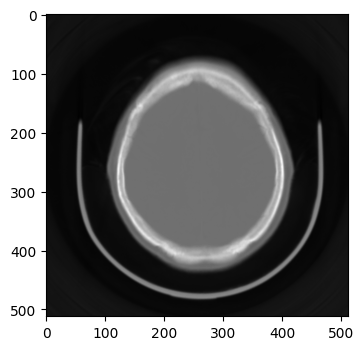

In [41]:
# 画像データを変数に代入
img = d.pixel_array

# 画像サイズの確認
print(img.shape)

# 表示サイズを大きくしています
fig = plt.figure(dpi=100)

# 画像表示
plt.imshow(img, cmap='gray')

# ローカルに保存する場合は以下の一行のコメントを外す
# plt.savefig('data.png')
plt.show()

うまく表示されたでしょうか．どこの部位の画像で，モダリティは何でしょうか？

他の DICOM 画像でも試してみましょう